In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os


In [24]:
# Importing the training set
script_dir = os.path.dirname('__file__')
train_set_path = os.path.join(script_dir, './Stock_Price_Train.csv')
dataset_train = pd.read_csv(train_set_path)


In [25]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [26]:
training_set = dataset_train.iloc[:, 1:2].values


In [27]:
training_set.shape

(1258, 1)

In [28]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [29]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)


In [30]:
training_set_scaled.shape

(1258, 1)

#### creating a data structure with 60 timestamp and 1 output

In [33]:
# Getting the inputs and the ouputs
X_train = []
Y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    Y_train.append(training_set_scaled[i,0] )

X_train,Y_train=np.array(X_train),np.array(Y_train)     

In [35]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

####  reshape

In [36]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [38]:
X_train.shape

(1198, 60, 1)

### Part 2 - Building the RNN 

### importing the keras libraries

In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### initilizing the RNN

In [78]:
regressor=Sequential()

#### Adding the frist LSTM layre and some dropout regularization

In [79]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#### Adding the second LSTM layre and some dropout regularization

In [80]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

#### Adding the third LSTM layre and some dropout regularization

In [81]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

#### Adding the fourth LSTM layre and some dropout regularization

In [82]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [83]:
regressor.add(Dense(units=1))

### compiling the RNN 

In [84]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

### Fitting the RNN to training set

In [85]:
regressor.fit(X_train,Y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0383
Epoch 2/100
1198/1198 [==============================] - 19s 15ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0060
Epoch 4/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0054
Epoch 9/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0042
Epoch 10/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0056
Epoch 11/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [============================

### part 3- Making the prediction and visualizing the result

### getting the real stock price of 2017

In [95]:
dataset_test = pd.read_csv('./Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


### Getting the pridicted stock price of 2017

In [87]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [88]:
# Getting the inputs and the ouputs
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

X_test=np.array(X_test) 
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [89]:
predicted_stock_prices=regressor.predict(X_test)

In [90]:
predicted_stock_prices=sc.inverse_transform(predicted_stock_prices)

In [92]:
predicted_stock_prices

array([[783.67163],
       [780.8696 ],
       [781.40936],
       [782.8059 ],
       [785.9784 ],
       [791.6552 ],
       [796.5451 ],
       [798.1283 ],
       [798.3294 ],
       [798.4094 ],
       [798.6023 ],
       [798.631  ],
       [798.57117],
       [799.16205],
       [800.0785 ],
       [804.85565],
       [811.6321 ],
       [818.5041 ],
       [821.67944],
       [816.73303]], dtype=float32)

### visualising the result

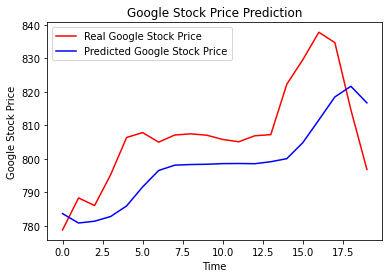

In [96]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_prices, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [99]:
regressor.save('predict.h5')